# Problem 1: Defect Prediction

In [83]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier




In [84]:
#Load the Dataset
data = pd.read_csv('jm1.csv')

Attribute Information:

loc : numeric % McCabe's line count of code

v(g) : numeric % McCabe "cyclomatic complexity"

ev(g) : numeric % McCabe "essential complexity"

iv(g) : numeric % McCabe "design complexity"

n : numeric % Halstead total operators + operands

v : numeric % Halstead "volume"

l : numeric % Halstead "program length"

d : numeric % Halstead "difficulty"

i : numeric % Halstead "intelligence"

e : numeric % Halstead "effort"

b : numeric % Halstead

t : numeric % Halstead's time estimator

lOCode : numeric % Halstead's line count

lOComment : numeric % Halstead's count of lines of comments

lOBlank : numeric % Halstead's count of blank lines

lOCodeAndComment : numeric

uniq_Op : numeric % unique operators

uniq_Opnd : numeric % unique operands

total_Op : numeric % total operators

total_Opnd : numeric % total operands

branchCount : numeric % of the flow graph

defects : {false,true} % module has/has not one or more reported defects

**Explore the Dataset**

In [85]:
data.shape

(10885, 22)

In [86]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [88]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

**Handle Missing Values**

In [90]:
print(data.isnull().sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


***no missing values

In [91]:
# Count the occurrences of True and False in the  column
value_counts = data['defects'].value_counts()

# Display the result
print(value_counts)

False    8779
True     2106
Name: defects, dtype: int64


In [92]:
data = data.apply(pd.to_numeric, errors='coerce')

In [93]:
print(data.isnull().sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64


In [94]:
data.fillna(data.mean(), inplace=True)

In [95]:
print(data.isnull().sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


**Data visualization**

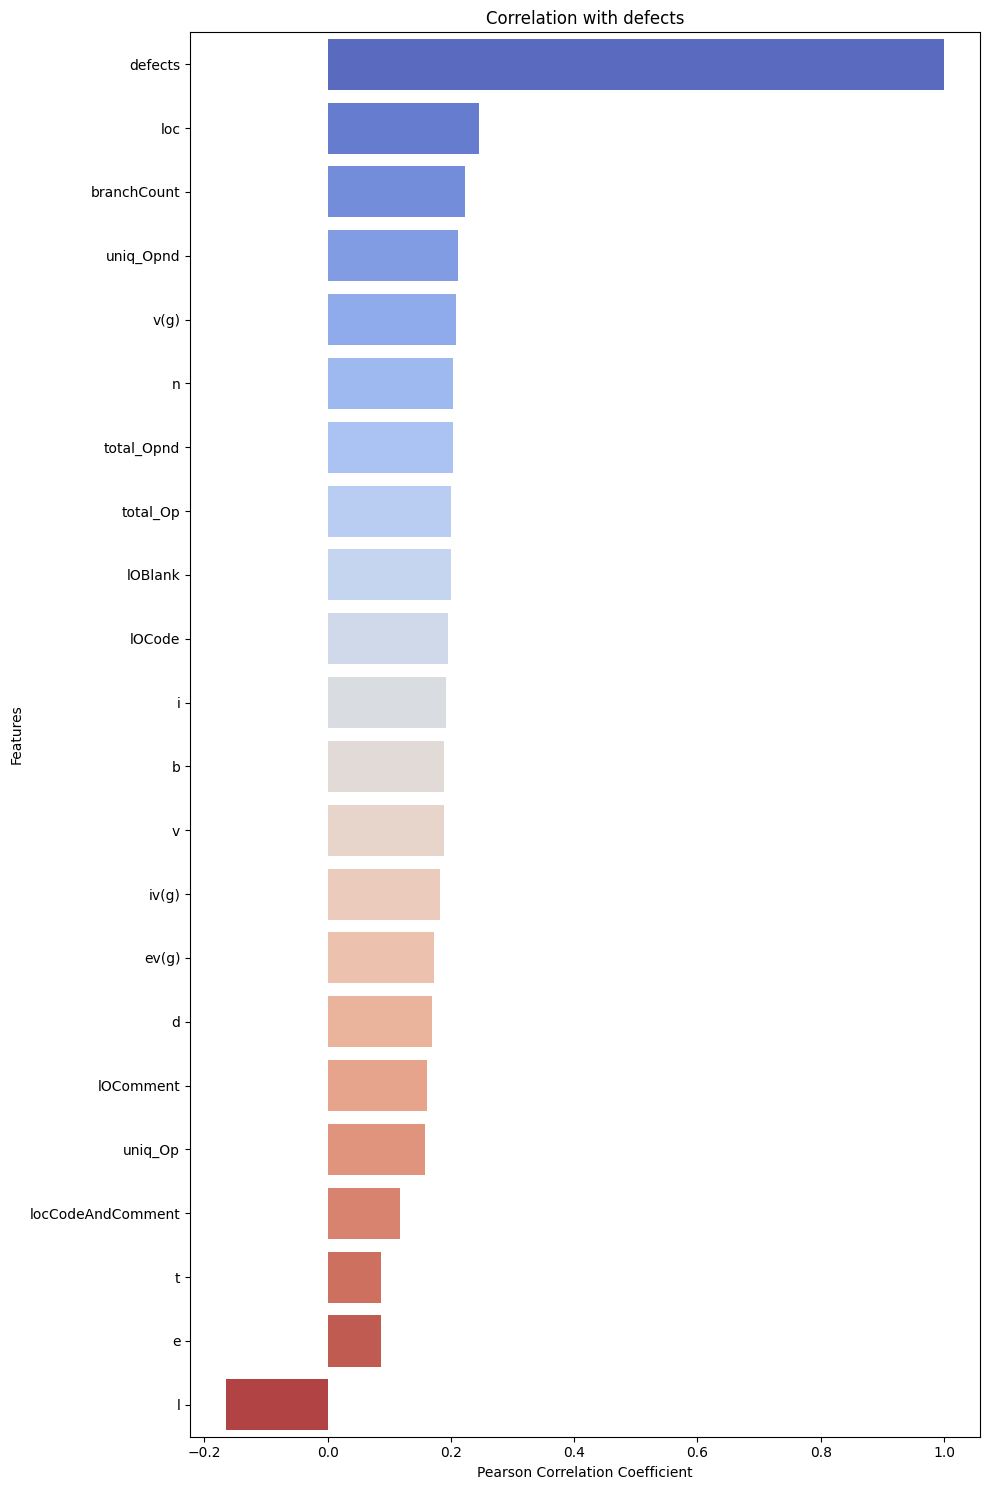

In [96]:
# Compute the correlation matri
corr_matrix = data.corr()

# Sort the correlations with respect to the target variable 'defects'
corr_with_target = corr_matrix["defects"].sort_values(ascending=False)

# Plotting the correlations with the target variable
plt.figure(figsize=(10, 15))
sns.barplot(y=corr_with_target.index, x=corr_with_target.values, palette="coolwarm")
plt.title("Correlation with defects")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

Heatmap


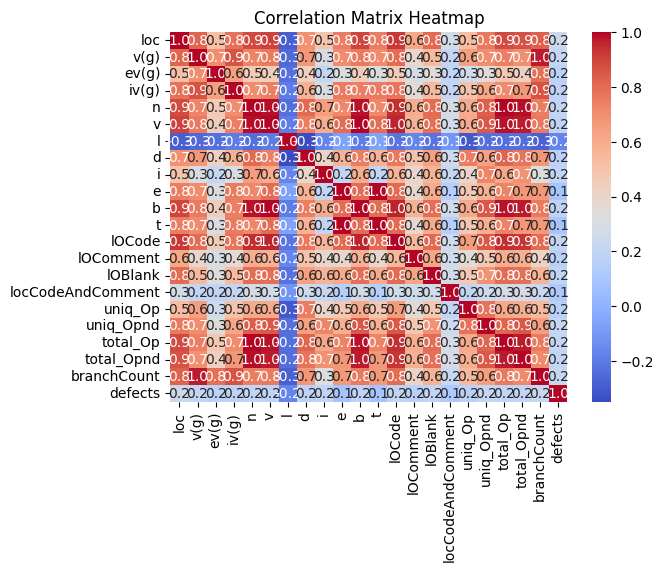

In [98]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [99]:
data.shape

(10885, 22)

In [ ]:

# def detect_outliers_for_each_feature_zscore(data, threshold=3):
#     outliers = []
#     for i in range(data.shape[1]):  # Iterate over each feature
#         feature_values = data[:, i]
#         z_scores = np.abs(stats.zscore(feature_values))
#         feature_outliers = np.where(z_scores > threshold)[0]
#         outliers.extend([(idx, i) for idx in feature_outliers])

#     return outliers

# # Example usage:
# data = np.random.randn(10885, 21)  # Replace this with your own dataset
# outliers = detect_outliers_for_each_feature_zscore(data)

# # Detect outliers using Z-score
# outliers_zscore = detect_outliers_for_each_feature_zscore(data)

# # Scatter plot with outliers highlighted
# for i in range(data.shape[1]):
#     feature_values = data[:, i]
#     plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i + 1}')
#     outliers_zscore_feature = [idx for idx, feat_idx in outliers_zscore if feat_idx == i]

#     plt.scatter(outliers_zscore_feature, data[outliers_zscore_feature, i], color='red', label='Z-score Outliers')


# plt.legend()
# plt.title('Outliers Detection for Each Feature')
# plt.xlabel('Sample Index')
# plt.ylabel('Feature Value')
# plt.show()

**Random** **Forest** **Classifier**

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming X is  feature matrix and y is  target variable
# X should be a 2D array or DataFrame with 21 features, and y should be a 1D array or Series with binary labels

X = data.iloc[:, :21]  # Assuming the first 20 columns are features
y = data.iloc[:, -1]   # Assuming the last column is the target variable



# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate error percentage
error_percentage = 100 * (1 - accuracy)


print(f"Accuracy: {accuracy}")


print(f"Error Percentage: {error_percentage:.2f}%")

print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.8190169958658705
Error Percentage: 18.10%
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.96      0.90      1758
        True       0.57      0.24      0.34       419

    accuracy                           0.82      2177
   macro avg       0.71      0.60      0.62      2177
weighted avg       0.79      0.82      0.79      2177

Confusion Matrix:
 [[1681   77]
 [ 317  102]]


Accuracy: 0.8079926504363804
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.99      0.89      1758
        True       0.51      0.04      0.08       419

    accuracy                           0.81      2177
   macro avg       0.66      0.52      0.49      2177
weighted avg       0.76      0.81      0.74      2177

Confusion Matrix:
 [[1741   17]
 [ 401   18]]


**Naive Bayes**

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets




X = data.iloc[:, :20]  # Assuming the first 20 columns are features
y = data.iloc[:, -1]   # Assuming the last column is the target variable



# Assume binary classification for defect prediction (0 or 1)
# Replace y with your binary labels if needed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8038585209003215
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.96      0.89      1758
        True       0.47      0.13      0.21       419

    accuracy                           0.80      2177
   macro avg       0.65      0.55      0.55      2177
weighted avg       0.75      0.80      0.76      2177



**Logistic Regression**

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame with features and the target variable
# Replace 'target_column' with the actual name of your target variable

# Assuming binary classification (0 or 1)
X = data.drop('defects', axis=1)
y = data['defects']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8079926504363804
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.99      0.89      1758
        True       0.51      0.04      0.08       419

    accuracy                           0.81      2177
   macro avg       0.66      0.52      0.49      2177
weighted avg       0.76      0.81      0.74      2177



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
